# ORIE 4580/5580/5581 Assignment 4

#### Students: Maddi Klancher (mrk256) and Sofia Paredes (smp343)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 29, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [1]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import random 

%matplotlib inline




---
---


# Question 1: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


___
## Ans.


___
## Ans.                                                                                                                                                                                                                                       
Define variables: 

$X = \mu_{\text{U.S. stocks}}$

$Y = \mu_{\text{U.S. bonds}}$

$Z = \mu_{\text{EM bonds}}$

Because all three investments are independent of each other, the covariance between any pair equals zero: 
$Cov(X,Y) = Cov(X,Z) = Cov(Y,Z) = 0$

Finding the probability that all three investments yield a positive return simutaneously equals:

$P(X>0, Y>0, Z>0)$

1. $P(X>0)$:

    $P(X>0) = 1-P(X<0)$

    $P(X<0) = P(Z<\frac{x-\mu}{\sigma}) = P(Z<\frac{0-0.14}{\sqrt{0.0625}}) $
    
    
2. $P(Y>0)$:

    $P(Y>0) = 1-P(Y<0)$

    $P(Y<0) = P(Z<\frac{y-\mu}{\sigma}) = P(Z<\frac{0-0.07}{\sqrt{0.01}}) $
    
    
3. $P(Z>0)$:

    $P(Z>0) = 1-P(Z<0)$

    $P(Z<0) = P(Z<\frac{y-\mu}{\sigma}) = P(Z<\frac{0-0.16}{\sqrt{0.09}})$
    
    
Therefore, $P(X>0, Y>0, Z>0) = P(X>0) * P(Y>0) * P(Z>0)$

$P(\text{all three investments simultaneously yield a positive return}) = 0.3796$


In [2]:
# define means
mean_x = 0.14
mean_y = 0.07
mean_z = 0.16

# define std
std_x = np.sqrt(0.0625)
std_y = np.sqrt(0.01)
std_z = np.sqrt(0.09)

# calculate z scores 
Z_x = (0-mean_x)/std_x
Z_y = (0-mean_y)/std_y
Z_z = (0-mean_z)/std_z

# calculate probabilities each investment >= 0
prob_x = 1-scipy.stats.norm.cdf(Z_x)
prob_y = 1-scipy.stats.norm.cdf(Z_y)
prob_z = 1-scipy.stats.norm.cdf(Z_z)

# calculate P(X>0,Y>0,Z>0)
total_prob = prob_x*prob_y*prob_z

print(total_prob)

0.3796164056673423


___

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
___

## Ans.



In [3]:
# set random seed
np.random.seed(42)

# define simulation
N = 1000
positive_count = 0  # counter of net annual positive returns on all 3 investments
ind_rvs = []
prob = 0

# define means
mu_x = 0.14
mu_y = 0.07
mu_z = 0.16

# define variance
var_x = 0.0625
var_y = 0.01
var_z = 0.09

# define st. dev
std_x = np.sqrt(var_x)
std_y = np.sqrt(var_y)
std_z = np.sqrt(var_z)

# define covariance 
cov_XY = -0.01
cov_XZ = 0.0375
cov_YZ = -0.015

# define a covariance matrix
sigma = np.array([[var_x, cov_XY, cov_XZ],
                  [cov_XY, var_y,  cov_YZ],
                  [cov_XZ, cov_YZ, var_z]])

# standardize the variables
def z_score(x,mean,std):
    z_score = 0
    z_score = ((x-mean)/std)
    return z_score

# execute Cholesky decomposition
L = scipy.linalg.cholesky(sigma, lower=True)

# mu vector
mu_arr = np.array([mu_x, mu_y, mu_z])

for i in range(N):
    
    # generate independent normal random variables ~ N(0,1)
    rv = np.random.normal(0, 1, 3)
    
    # Use Choslesky decomposition to transform uncorrelated normal r.vs into correlated r.vs 
    corr_vars = (mu_arr + np.dot(L, rv))
    
    if(corr_vars[0] > 0 and corr_vars[1] > 0 and corr_vars[1] > 0):
        positive_count += 1
    
# calculate simulated average
prob = positive_count/N
print("Estimated probability that all three investments simultaneously yield a higher return: ", prob)

Estimated probability that all three investments simultaneously yield a higher return:  0.502


$ = 0.502$

___
___

# Question 2: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

___

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.
___


## Ans.

## Ans.

Mean of a uniform distribution on $[\alpha,\beta] = \frac{(\alpha + \beta)}{2}$

Mean: 

$E[X] = 0$

$\frac{(\alpha + \beta)}{2} = 0 $

$(\alpha + \beta)= 0 $

Therefore, $\alpha = -\beta $

Variance: 

$Var[X] = 1$

$\frac{(\beta - \alpha)^2}{12} = 1 $

$(\beta - \alpha)^2= 12 $

$(\beta - \alpha)= \sqrt{12} $

Plug in $\alpha = -\beta $: 

$(\beta - (-\beta))= \sqrt{12}$

$2\beta = \sqrt{12}$

$2\beta = 2\sqrt{3}$

$\beta = \sqrt{3}$

Therefore, $\alpha = -\sqrt{3}, \beta = \sqrt{3} \in\mathbb{R}$




___

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?
___

## Ans.

Expected Value:

$\mathbb{E}[V_2] = E[(1-B)X_1 + BX_2]$

$\mathbb{E}[X_1]=\mathbb{E}[X_2]=0$ as uniform random variables $X_1,X_2\sim Uniform[\alpha,\beta]$

Therefore, $\mathbb{E}[V_2] =0$

Variance: 

$\mathbb{Var}[X] = E[X^2] - E[X]^2$

$\mathbb{Var}[V_2] = E[V_2^2] - E[V_2]^2$

$\mathbb{E}[V_2] =0$

Therefore, $\mathbb{Var}[V_2] = E[V_2^2]$

Considering the Law of Total Expectation: 

$\mathbb{E}[X] = \Sigma_{i}E[X|Y_i]*P(Y_i)$ 

In this case: 

$\mathbb{E}[V_2] = E[X_1|B=0]*(1-p) + E[X_2|B=1]*(p)$ 

$\mathbb{E}[V_2^2] = E[V_2^2|B=0]*(1-p) + E[V_2^2|B=1]*(p)$ 

$ E[V_2^2|B=0]*(1-p) = E[X_1^2] $

From 2a) $E[X_1] = 1$

$E[X_1^2] = 1 $

Therefore, $\mathbb{Var}[V_2] = 1 $





___
**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?
___

## Ans.

$Cov(V_1,V_2) =  E[(V_1-E[V_1])(V_2-E[V_2])$

$E[V_1] = E[V_2] = 0$, so simplified: 

$Cov(V_1,V_2) =  E[(V_1)(V_2)] = \sigma_{12}$

$E[(V_1)(V_2)] =  E[X_1^2]*(1-p) + E[X_1X_2]*p = \sigma_{12}$

$E[X_1X_2] = E[X_1] * E[X_2] = 0 * 0 = 0$

Therefore, $E[(V_1)(V_2)] =  E[X_1^2]*(1-p)$

$E[X_1^2] = 1$, so $Cov(V_1,V_2) = 1-p$


$ 1-p = \sigma_{12} $

$ p = 1 - \sigma_{12}$

___

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

___

## Ans.

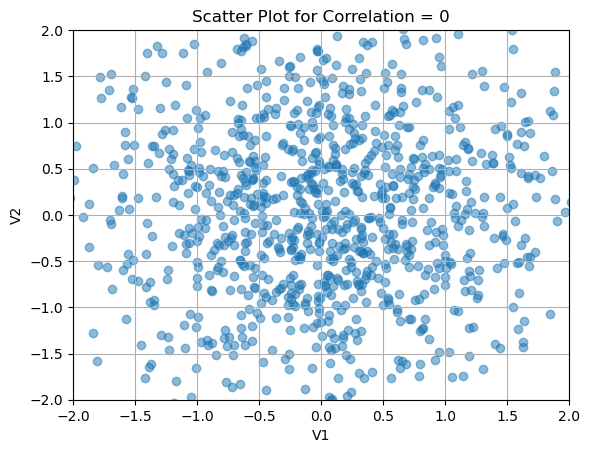

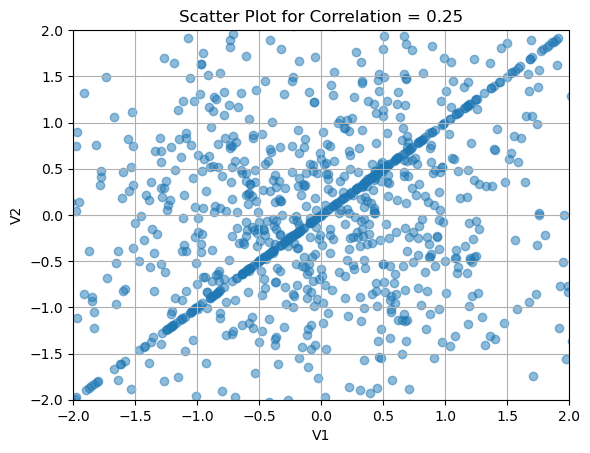

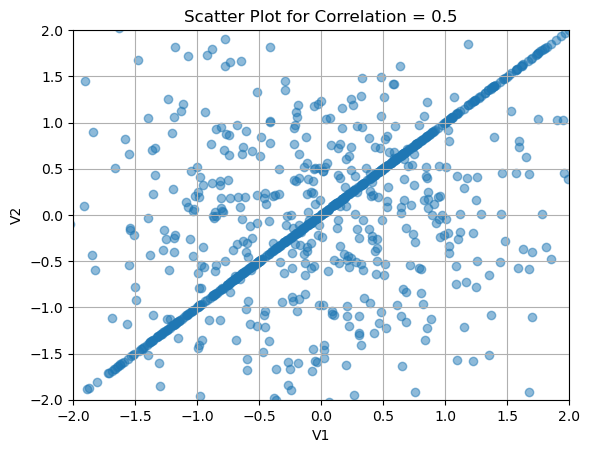

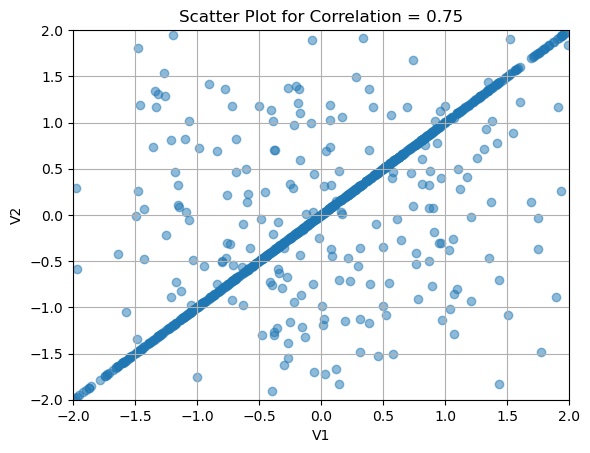

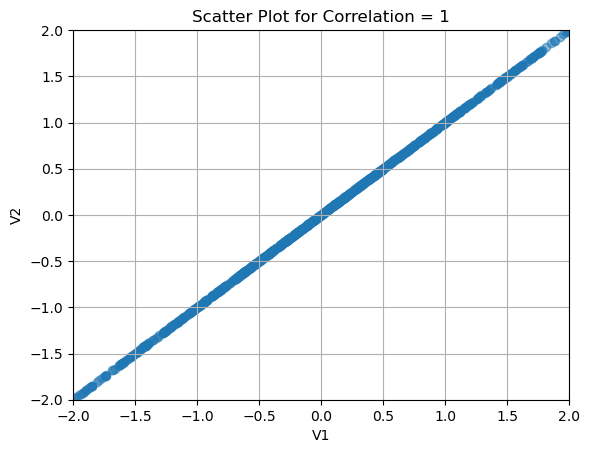

In [4]:
np.random.seed(42)

#define simulation
v1_arr = []
v2_arr = []

# for covariance:
# if B= 0: return (x1,x1)
# if B=1: return (x1,x2)

# then call functions for each sigma for p 


sigma_arr = [0, 0.25, 0.5, 0.75, 1]

def cov(sigma):
    p = 1-sigma
    B = 1 if random.random() < p else 0
    if B == 0:        # E[X1^2]
        return 1
    if B == 1:        # E[X1*X2]
        return 0

def generate_rvs(corr):
    mean = [0,0]
    var = [1,1]
    
    cov_matrix = [[1,corr],[corr,1]]
    v1, v2 = np.random.multivariate_normal(mean,cov_matrix).T
    
    return v1,v2


for i in sigma_arr:
    
    for j in range(1000):
        corr = cov(i) # rho_xy = cov(xy)/(std_x*std_y) , std_x = std_y = 1 so rho_xy = cov(xy)
        v1, v2 = generate_rvs(corr)
        
        v1_arr.append(v1)
        v2_arr.append(v2)
    
    # create scatter plot
    plt.figure()
    plt.scatter(v1_arr,v2_arr, alpha =0.5)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.title(f'Scatter Plot for Correlation = {i}')
    plt.xlabel('V1')
    plt.ylabel('V2')
    plt.grid(True)
    plt.show()
    
    v1_arr = []
    v2_arr = []

___

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').
___

## Ans.

In [5]:
np.random.seed(42)

sigma = 0.5
N = 10000
negative_count = 0

for i in range(N):
    v1, v2 = generate_rvs(sigma)
    
    if v1 <= 0 and v2 <= 0:
        negative_count += 1

prob = negative_count/N
print("P[V1 <= 0, V2 <= 0] = ", prob)

P[V1 <= 0, V2 <= 0] =  0.3356


___

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

___

## Ans.

Argue $W_1, W_2$ are uniform on $[\alpha,\beta]$:

Therefore, $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$

To do so, run a simulation to estimate $\mathbb{E}[W_1], \mathbb{E}[W_2], Var(W_1), Var(W_2)$ 


In [6]:
np.random.seed(42)

# define simuluation variables
N = 10000
W1_total = 0
W2_total = 0
W1_sq_total = 0
W2_sq_total = 0

# define uniform distribution over [alpha, beta]
alpha = -np.sqrt(3)
beta = np.sqrt(3)

# define z1,z2
mu_z = [0,0]
sigma_z = [[1, 0.5],
          [0.5, 1]]

for i in range(N):
    # generate independent normal random variables ~ N(0,1)
    rv = np.random.normal(0, 1, 2)

    # Use Choslesky decomposition to transform uncorrelated normal r.vs into correlated r.vs 
    L = scipy.linalg.cholesky(sigma_z, lower=True)
    z1,z2 = (mu_z + np.dot(L, rv))

    # phi() function 
    phi_z1 = scipy.stats.norm.cdf(z1)
    phi_z2 = scipy.stats.norm.cdf(z2)

    # define W1 and W2
    W1 = alpha + (beta-alpha)*phi_z1
    W2 = alpha + (beta-alpha)*phi_z2
    
    # simulate E[W]: 
    # add to total values for simulated means 
    W1_total += W1
    W2_total += W2
    
    # Var[W] = E[W^2] - (E[X])^2
    # simulate E[W^2]:
    # add to total values for simulated means 
    W1_sq = W1**2
    W2_sq = W2**2
    
    W1_sq_total += W1_sq
    W2_sq_total += W1_sq
    
    
# calculate E[W]: simulated means
W1_mean = W1_total/N
W2_mean = W2_total/N 

# calculate E[W^2]: simulated means
W1_sq_mean = W1_sq_total/N
W2_sq_mean = W2_sq_total/N

# calculate Var[W]
W1_var = W1_sq_mean - (W1_mean)**2
W2_var = W2_sq_mean - (W2_mean)**2

print("Mean:")
print("E[W1]: ", W1_mean)
print("E[W2]: ", W2_mean)
print("Therefore, E[W1] and E[W2] ~ 0")

print("Variance:")
print("Var[W1]: ", W1_var)
print("Var[W2]: ", W2_var)
print("Therefore, Var[W1] and Var[W2] ~ 1")

Mean:
E[W1]:  0.003651228419376792
E[W2]:  0.008632629476999462
Therefore, E[W1] and E[W2] ~ 0
Variance:
Var[W1]:  1.0097339246645118
Var[W2]:  1.0096727338417952
Therefore, Var[W1] and Var[W2] ~ 1


P[W1 >= 0, W2 >= 0] =  0.3406


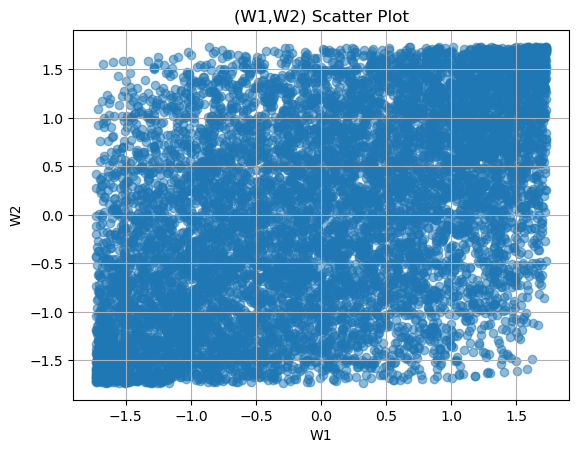

In [7]:
np.random.seed(42)

sigma = 0.5
N = 10000
positive_count = 0

# define z1,z2
mu_z = [0,0]
sigma_z = [[1, 0.5],
          [0.5, 1]]

W1_arr = []
W2_arr = [] 

for i in range(N):
    
    # generate independent normal random variables ~ N(0,1)
    rv = np.random.normal(0, 1, 2)

    # Use Choslesky decomposition to transform uncorrelated normal r.vs into correlated r.vs 
    L = scipy.linalg.cholesky(sigma_z, lower=True)
    z1,z2 = (mu_z + np.dot(L, rv))

    # phi() function 
    phi_z1 = scipy.stats.norm.cdf(z1)
    phi_z2 = scipy.stats.norm.cdf(z2)

    # define W1 and W2
    W1 = alpha + (beta-alpha)*phi_z1
    W2 = alpha + (beta-alpha)*phi_z2
    
    if W1 >= 0 and W2 >= 0:
        positive_count += 1
    
    # add to W1 and W2 arrays
    W1_arr.append(W1)
    W2_arr.append(W2)

prob = positive_count/N
print("P[W1 >= 0, W2 >= 0] = ", prob)

# create a scatter plot 
plt.figure()
plt.scatter(W1_arr, W2_arr, alpha=0.5)
plt.title('(W1,W2) Scatter Plot')
plt.xlabel('W1')
plt.ylabel('W2')
plt.grid(True)
plt.show()

$P[W1 >= 0, W2 >= 0] = 0.3406$

___
___

# Question 3: Generating random samples in some given set (20 pts)

___

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).
___

## Ans.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

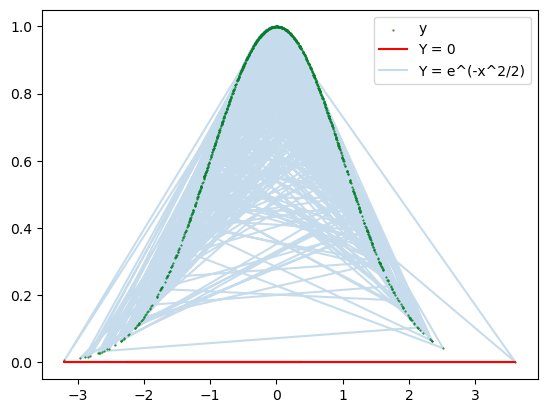

In [9]:
x_rand = np.random.normal(size = 1000)
y = []
other = []
#x = np.arange(0,1000)
for i in range(len(x_rand)):  
    y.append(np.exp(-(x_rand[i]**2)/2))
    other.append(np.exp(-(x_rand[i]**2)/2))


y_zero = [0] * len(x_rand)
plt.scatter(x_rand, y, color = 'g', label = 'y', s = .25)
plt.plot(x_rand, y_zero, label = 'Y = 0', color = 'r')
plt.plot(x_rand, other, label = 'Y = e^(-x^2/2)', alpha = .25)
plt.legend()
plt.show()

___
**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).
___

## Ans.

In [10]:
u = np.random.uniform(-1,1,1000)
v = np.random.uniform(-1,1,1000)

x = np.empty(shape = 1000)
y = np.empty(shape = 1000)
theta = np.empty(shape = 1000)

for i in range(len(u)):
    x[i] = u[i] / np.sqrt(u[i]**2 + v[i]**2)
    y[i] = v[i] / np.sqrt(u[i]**2 + v[i]**2)
    theta[i] = np.arctan(y[i]/x[i])
    

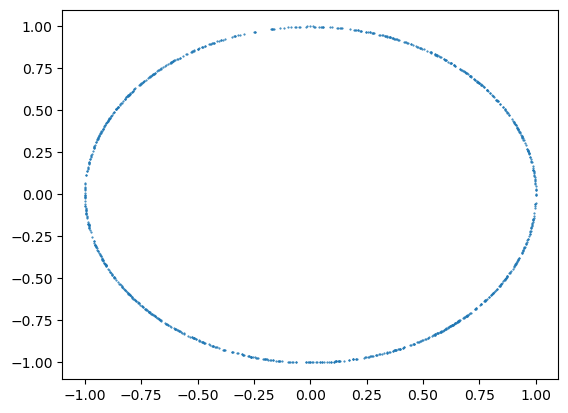

In [11]:
plt.scatter(x, y, s = .25)
plt.show()

(array([0.21382813, 0.32552939, 0.43084773, 0.37659283, 0.22021106,
        0.26489157, 0.35106111, 0.4244648 , 0.315955  , 0.26808303]),
 array([-1.56272086, -1.2493851 , -0.93604934, -0.62271358, -0.30937782,
         0.00395794,  0.3172937 ,  0.63062946,  0.94396521,  1.25730097,
         1.57063673]),
 <BarContainer object of 10 artists>)

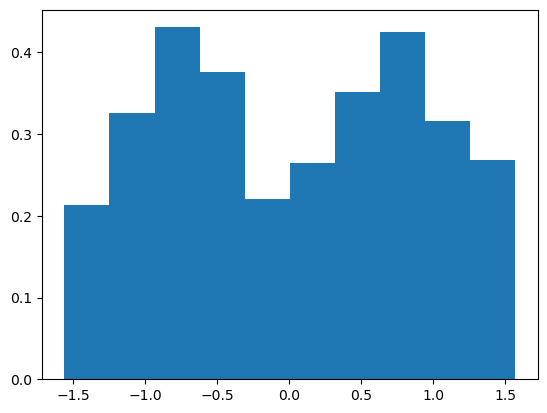

In [12]:
plt.hist(theta, density = True)

The points are uniformly distributed on the circumference of the circle as seen by the symmetry of the histogram of the angles. 



---

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$, and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

___

## Ans.

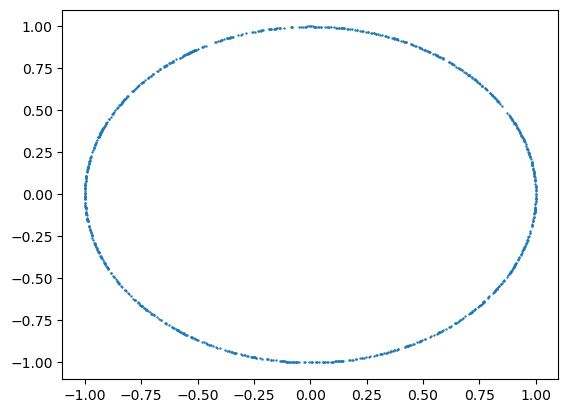

In [13]:
z = np.random.standard_normal(size = 1000)
w = np.random.standard_normal(size = 1000)

x = np.empty(shape = 1000)
y = np.empty(shape = 1000)

for i in range(1000):
    x[i] = z[i]/np.sqrt(z[i]**2 + w[i]**2)
    y[i] = w[i]/np.sqrt(z[i]**2 + w[i]**2)
    
plt.scatter(x, y, s = .5)

(array([ 85., 104.,  89., 116.,  99., 109., 104.,  94., 101.,  99.]),
 array([-1.56962087e+00, -1.25576569e+00, -9.41910511e-01, -6.28055333e-01,
        -3.14200154e-01, -3.44975941e-04,  3.13510202e-01,  6.27365381e-01,
         9.41220559e-01,  1.25507574e+00,  1.56893092e+00]),
 <BarContainer object of 10 artists>)

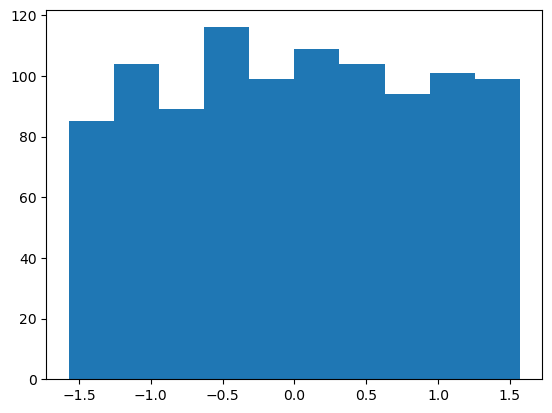

In [14]:
theta = np.empty(shape = 1000)

for i in range(len(theta)):
    theta[i] = np.arctan(y[i]/x[i])
    
plt.hist(theta)

Generating random points as standard normals does not yield us normally distributed points as seen in part (b). 

___
___

# Question 4: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1,000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

___

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.
___


## Ans.

In [15]:
p = np.sort(np.random.uniform(0, 1000, 10000)) #time each passenger arrives between 0 and 1000 minutes
trains = np.arange(10, 1010, 10) #time each train leaves between 0 and 1000 minutes
p_on = [] #stores how many passengers got on each train
wait = [] #stores how much each passenger had to wait to get on train

for i in range(len(trains)):
    upper = trains[i] 
    lower = trains[i] - 10
    count = 0
    for j in range(len(p)):
        if p[j] >= lower and p[j] < upper:
            count += 1
            wait.append(upper - p[j]) #wait time for each passenger until next train 
    p_on.append(count)
        

In [16]:
#95% confidence interval --> z = 1.96
mean_wait = np.mean(wait)
print('The expected wait time for each passenger in this simulation is ' + str(round(mean_wait,2)) + ' minutes')
std_wait = np.std(wait)
n = len(p)
ci_lower = round(mean_wait - 1.96 * (std_wait/np.sqrt(n)), 2)
ci_upper = round(mean_wait + 1.96 * (std_wait/np.sqrt(n)),2)
interval = '(' + str(ci_lower) +',' + str(ci_upper)+ ')'
print('With 95% confidence, the average wait time, in minutes, for each passenger lies between: ' +str(interval))

The expected wait time for each passenger in this simulation is 4.99 minutes
With 95% confidence, the average wait time, in minutes, for each passenger lies between: (4.94,5.05)


___
**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.
___


## Ans.

In [17]:
t = 0 
trains_exp = [t]
wait_exp = []
counter_p_on = []

while t < 1000:
    t += np.random.exponential(10)
    trains_exp.append(t)
    
for i in range(1, len(trains_exp)):
    upper = trains_exp[i]
    lower = trains_exp[i-1]
    count = 0 
    for j in range(len(p)):
        if p[j] >= lower and p[j] < upper:
            count += 1
            wait = upper - p[j]
            wait_exp.append(wait)
    counter_p_on.append(count)


In [18]:
mean = np.mean(wait_exp)
std = np.std(wait_exp)
n = len(p)
lower_ci = round(mean - 1.96 * std/np.sqrt(n),2)
upper_ci = round(mean + 1.96 * std/np.sqrt(n), 2)
interval = '(' + str(lower_ci) +',' + str(upper_ci)+ ')'
print('The expected wait time for each passenger in this simulation is '+ str(round(mean, 2)) + ' minutes')

print('With 95% confidence, the average wait time falls within this interval: ' +str(interval))



The expected wait time for each passenger in this simulation is 11.06 minutes
With 95% confidence, the average wait time falls within this interval: (10.82,11.29)


___

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

___

In [19]:
#using trains_exp
between = []

for i in range(1, len(trains_exp)):
    arrival = trains_exp[i] - trains_exp[i-1]
    between.append(arrival)

In [20]:
mean_train = np.mean(between)
std_train = np.std(between)
print('The expected inter-arrival time between trains in this simulation is ' + str(round(mean_train, 2)) + ' minutes')
lower_ci = round(mean_train - 1.96 * std_train/np.sqrt(len(trains_exp)), 2)
upper_ci = round(mean_train + 1.96 * std_train/np.sqrt(len(trains_exp)), 2)
interval = '(' + str(lower_ci) + ',' + str(upper_ci) + ')'
print('With 95% confidence, the average inter-arrival time falls in this interval: ' + str(interval))

The expected inter-arrival time between trains in this simulation is 9.63 minutes
With 95% confidence, the average inter-arrival time falls in this interval: (7.55,11.71)


___

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

___

## Ans.

In [21]:
#Part A
mean = np.mean(wait_exp)
std = np.std(wait_exp)
n = len(p)
lower_ci = round(mean - 1.96 * std/np.sqrt(n),2)
upper_ci = round(mean + 1.96 * std/np.sqrt(n), 2)
interval = '(' + str(lower_ci) +',' + str(upper_ci)+ ')'
print('Part A')
print('The expected wait time for each passenger in this simulation is '+ str(round(mean, 2)) + ' minutes')

print('With 95% confidence, the average wait time falls within this interval: ' +str(interval))

print('\n')

#Part B
print('Part B')
mean_train = np.mean(between)
std_train = np.std(between)
print('The expected inter-arrival time between trains in this simulation is ' + str(round(mean_train, 2)) + ' minutes')
lower_ci = round(mean_train - 1.96 * std_train/np.sqrt(len(trains_exp)), 2)
upper_ci = round(mean_train + 1.96 * std_train/np.sqrt(len(trains_exp)), 2)
interval = '(' + str(lower_ci) + ',' + str(upper_ci) + ')'
print('With 95% confidence, the average inter-arrival time falls in this interval: ' + str(interval))

Part A
The expected wait time for each passenger in this simulation is 11.06 minutes
With 95% confidence, the average wait time falls within this interval: (10.82,11.29)


Part B
The expected inter-arrival time between trains in this simulation is 9.63 minutes
With 95% confidence, the average inter-arrival time falls in this interval: (7.55,11.71)


In part A, there is a constant waiting time but in B the waiting times are dependent on a stochastic process, which causes there to be variation in the inter arrival time. This leads to different waiting times and thus more variation between the lower and upper confidence interval values than seen in part A. 

**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  